IMPORT LIBRARIES AND DATASET

In [ ]:
# Importing required libraries
import pandas as pd              # for data manipulation
import numpy as np               # for numerical operations
import matplotlib.pyplot as plt  # for plotting graphs
import seaborn as sns            # for data visualization
from sklearn.model_selection import train_test_split  # for splitting the dataset
from sklearn.linear_model import LinearRegression     # for linear regression model
from sklearn.metrics import mean_squared_error, r2_score  # for model evaluation metrics


# Use file upload function
from google.colab import files
uploaded = files.upload()

# Load the dataset
data = pd.read_csv("tips.csv")

# Display the first few rows of the dataset
data.head()


Saving tips.csv to tips (1).csv


,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


DATA OVERVIEW

In [ ]:
# Check data types and null values
print(data.info())

# Check for any missing values
print(data.isnull().sum())

# Display summary statistics
print(data.describe())



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   total_bill  244 non-null    float64
 1   tip         244 non-null    float64
 2   sex         244 non-null    object 
 3   smoker      244 non-null    object 
 4   day         244 non-null    object 
 5   time        244 non-null    object 
 6   size        244 non-null    int64  
dtypes: float64(2), int64(1), object(4)
memory usage: 13.5+ KB
None
total_bill    0
tip           0
sex           0
smoker        0
day           0
time          0
size          0
dtype: int64
       total_bill         tip        size
count  244.000000  244.000000  244.000000
mean    19.785943    2.998279    2.569672
std      8.902412    1.383638    0.951100
min      3.070000    1.000000    1.000000
25%     13.347500    2.000000    2.000000
50%     17.795000    2.900000    2.000000
75%     24.127500    3.562500    3.00000

DATA CLEANING

In [ ]:
# Drop duplicates if any
data = data.drop_duplicates()

# Handle missing values if any (example)
# data.fillna(method='ffill', inplace=True)


Exploratory Data Analysis (EDA)

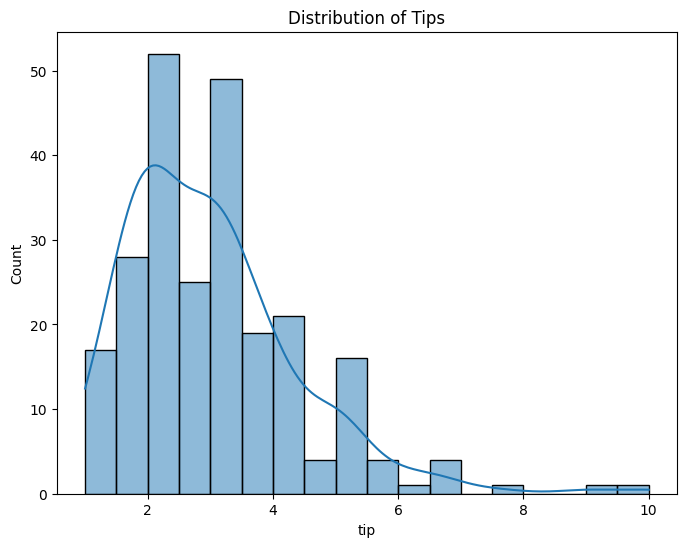

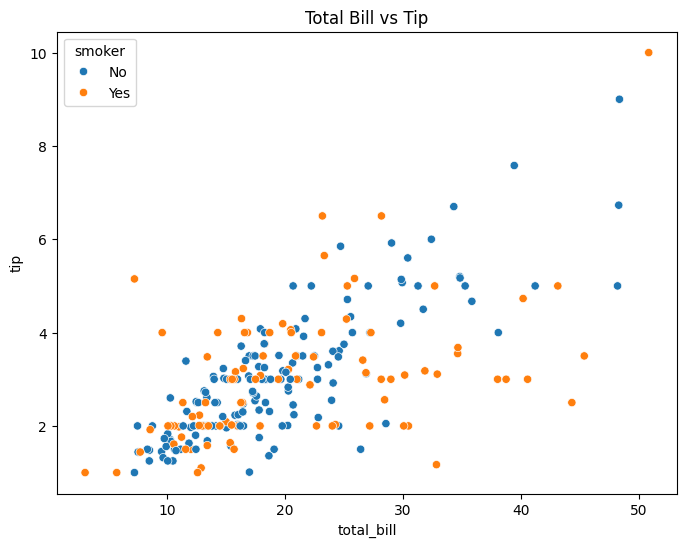

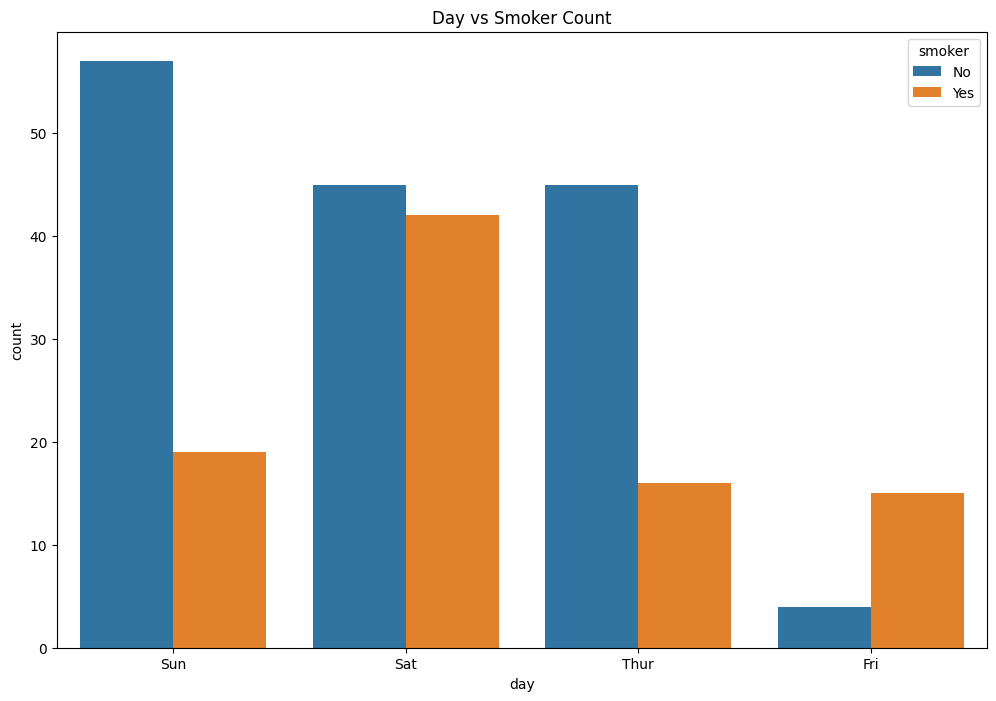

In [ ]:
# Visualize the distribution of the target variable
plt.figure(figsize=(8, 6))
sns.histplot(data['tip'], kde=True)
plt.title("Distribution of Tips")
plt.show()

# Relationship between total bill and tip
plt.figure(figsize=(8, 6))
sns.scatterplot(data=data, x='total_bill', y='tip', hue='smoker')
plt.title("Total Bill vs Tip")
plt.show()

# Categorical count plots
plt.figure(figsize=(12, 8))
sns.countplot(x='day', hue='smoker', data=data)
plt.title("Day vs Smoker Count")
plt.show()


FEATURE SELECTION

In [ ]:
# One-hot encode categorical variables like 'sex', 'smoker', 'day', 'time'
data = pd.get_dummies(data, columns=['sex', 'smoker', 'day', 'time'], drop_first=True)


SPLITING THE DATASET

In [ ]:
# Define features and target variable
X = data.drop("tip", axis=1)
y = data["tip"]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


MODEL TRANING

In [ ]:
# Initialize the model
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)


LinearRegression()

MODEL EVALUATION

In [ ]:
# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate evaluation metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error (MSE):", mse)
print("R-squared (R2):", r2)


Mean Squared Error (MSE): 1.1730028226689764
R-squared (R2): 0.5185656337107039


 Visualize Predicted vs. Actual Values

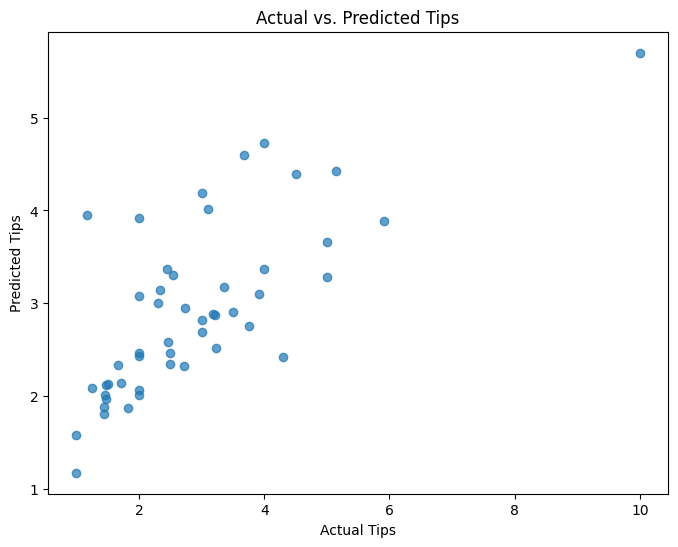

In [ ]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.7)
plt.xlabel("Actual Tips")
plt.ylabel("Predicted Tips")
plt.title("Actual vs. Predicted Tips")
plt.show()
